In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli, process_fidelity
from qiskit.extensions import RXGate, XGate, CXGate

from utils import *

# Scrambling Operators

## Us

Reference: http://iontrap.umd.edu/wp-content/uploads/2013/10/FiggattThesis.pdf


From Scrambling Library
![Us_525.jpg](.\\pics\\Us_525.jpg)

In [2]:
# Scrambling Operator Us

Us = Operator([[-1,0,0,-1,0,-1,-1,0], 
               [0,1,-1,0,-1,0,0,1], 
               [0,-1,1,0,-1,0,0,1], 
               [1,0,0,1,0,-1,-1,0],
               [0,-1,-1,0,1,0,0,1],
               [1,0,0,-1,0,1,-1,0],
               [1,0,0,-1,0,-1,1,0],
               [0,-1,-1,0,-1,0,0,-1]
              ])

Us = 1/2*Us

# Test:

In [3]:
from qiskit.test.mock import FakeAlmaden, FakeMelbourne
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, IBMQ, transpile, schedule, assemble

# load account
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

# simulators:
f_alma = FakeAlmaden() # simulator f_alma for pulse schedules
f_mel = FakeMelbourne() # simulator f_mel for simulator backend mel


 fake_melbourne

 Fidelity Bob Qubit: 	60.67%

 Fidelity Bob Partner: 	45.77%

 Fidelity Base Meas A: 	45.37%

 Fidelity Base Meas B: 	46.42%


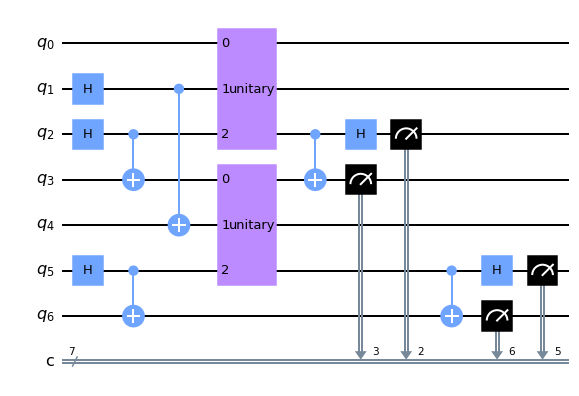

In [6]:
########################### circuit and structure #########################

n = 7
circ = QuantumCircuit(n,n)

bell_pairs = get_bell_pairs(circ)
upper_pairs, lower_pairs = get_unitary_pairs(circ)

basemeas, bob_pair = bell_pairs[0], bell_pairs[-1]
meas_a_i, meas_b_i = -1 * (basemeas[0]+1), -1 * (basemeas[1]+1)

###################### apply protocol via Unitary Us ######################

bell_pairs = get_bell_pairs(circ)
entangle_bell_pairs(circ, bell_pairs)

circ.append(Us,[0,1,2])
circ.append(Us,[3,4,5])

insert_bell_measurement(circ, [2,3])
insert_bell_measurement(circ, [5,6])

########################### run simulation ################################

be = f_mel
pct = 100
shots = 100*pct
qobj = assemble(circ, shots=shots)
result = be.run(qobj).result().get_counts()

############################ see results ##################################

bob_meas_1  = sum([v for (k,v) in result.items() if k[0]=="1"])
bob_p_meas_1 = sum([v for (k,v) in result.items() if k[1]=="1"])
meas1_1 = sum([v for (k,v) in result.items() if k[meas_a_i]=="1"])
meas2_1 =  sum([v for (k,v) in result.items() if k[meas_b_i]=="1"])
print("\n",be)
print("\n Fidelity Bob Qubit: \t{}%".format(bob_meas_1/pct)) 
print("\n Fidelity Bob Partner: \t{}%".format(bob_p_meas_1/pct)) 
print("\n Fidelity Base Meas A: \t{}%".format(meas1_1/pct)) 
print("\n Fidelity Base Meas B: \t{}%".format(meas2_1/pct)) 

circ.draw('mpl',plot_barriers=False)